<a href="https://colab.research.google.com/github/wonyoung-ji/asiae_edu/blob/master/ML/200818_iris_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sklearn
print(sklearn.__version__)

0.22.2.post1


# 1. 개요

# (1) 패키지 불러오기

# (2) 데이터 불러오기


* sklearn 패키지 내장 데이터 있음




In [ ]:
from sklearn.datasets import load_iris
iris=load_iris()      # bunch 형태의 데이터셋으로 구성되어 있음


# 독립변수로 구성된 데이터
iris_data=iris.data

#종속변수
iris_label = iris.target
print('iris target 값:', iris_label[[0,50,100]])
print('iris target 명:', iris.target_names)




iris target 값: [0 1 2]
iris target 명: ['setosa' 'versicolor' 'virginica']


# (3) 데이터 전처리
- 상황: Numpy 형태, 리스트
- 방법: pandas를 활용해서 데이터 프레임 만들기

In [ ]:
import pandas as pd
import numpy as np

def sklearn_to_df(sklearn_dataset):
    df = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
    df['target'] = pd.Series(sklearn_dataset.target)
    return df
    
df_iris = sklearn_to_df(load_iris())
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# (4) 데이터 시각화


*   시각화를 위한 전처리






In [ ]:
temp_data = df_iris.copy()

# column 명 바꾸기
temp_data.columns = ['sepal_length','sepal_width','petal_length','petal_width','species']
temp_data


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
#map

replace_fct = {0:'setosa', 1:'versicolor',2:'virginica'}
temp_data['species'] = temp_data['species'].map(replace_fct)

temp_data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


(array([ 4.,  5.,  7., 16.,  9.,  5., 13., 14., 10.,  6., 10., 16.,  7.,
       11.,  4.,  2.,  4.,  1.,  5.,  1.]), array([4.3 , 4.48, 4.66, 4.84, 5.02, 5.2 , 5.38, 5.56, 5.74, 5.92, 6.1 ,
       6.28, 6.46, 6.64, 6.82, 7.  , 7.18, 7.36, 7.54, 7.72, 7.9 ]), <a list of 20 Patch objects>)


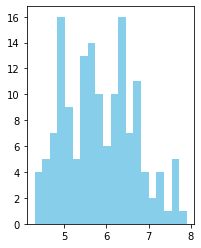

In [ ]:
# histogram boxplot

import matplotlib.pyplot as plt

plt.figure(figsize = (3,4))

x = temp_data['sepal_length']
y = temp_data['petal_length']

print(plt.hist(x, bins = 20, color = "skyblue", fill='species' ))


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


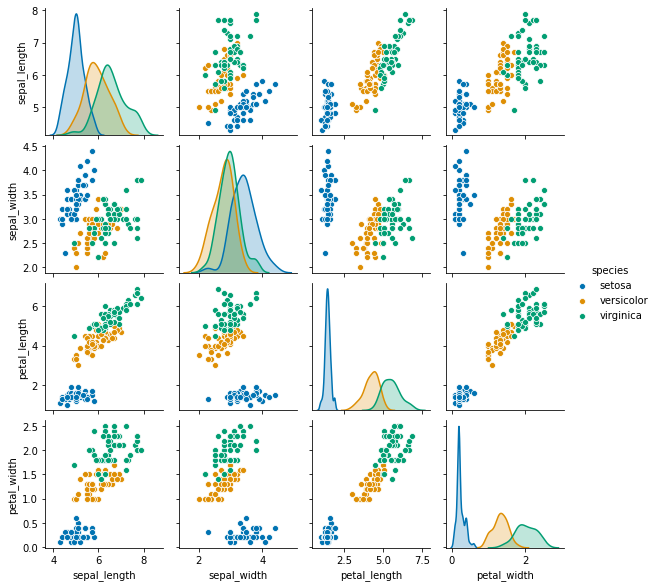

In [ ]:
import seaborn as sns
sns.pairplot(temp_data, hue="species", height = 2, palette = 'colorblind');

#(5) 데이터셋분리


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_data, # 독립변수 
                                                    iris_label, # 종속변수 
                                                    test_size = 0.2, 
                                                    random_state = 1)

# (6) 머신러닝 모형 학습

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=11, max_depth=2)
# dt_clf
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=11, splitter='best')

# (7) 모형테스트

In [ ]:
from sklearn.metrics import accuracy_score
pred = dt_clf.predict(X_test)
print('The accuracy of the Decision Tree is: {:.3f}'.format(accuracy_score(pred,y_test)))

The accuracy of the Decision Tree is: 0.967


# (8) 모형결과시각화



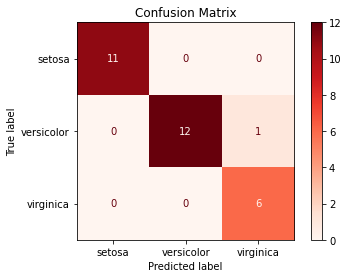

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import plot_confusion_matrix

labels = ['setosa', 'versicolor', 'virginica']
disp = plot_confusion_matrix(dt_clf, 
                             X_test, y_test, 
                             display_labels=labels, 
                             cmap=plt.cm.Reds, 
                             normalize=None)
disp.ax_.set_title('Confusion Matrix');

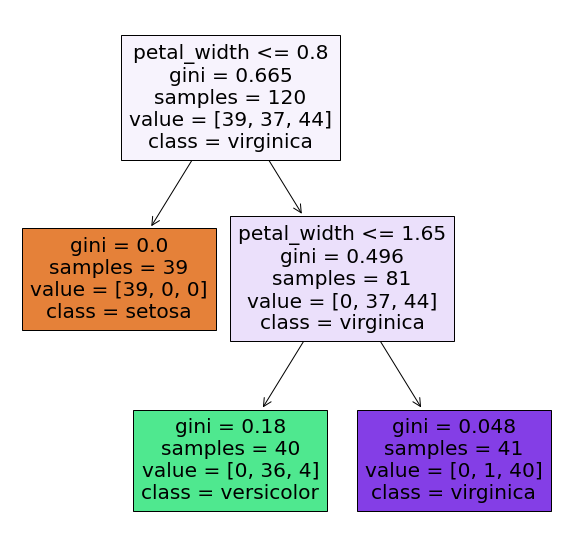

In [ ]:
import matplotlib.pyplot as plt

explt_vars = ['sepal_length','sepal_width','petal_length','petal_width']
fct_val = {0: 'setosa', 1: 'versicolor', 2: "virginica"}

plt.figure(figsize = (10,10))
plot_tree(dt_clf, feature_names = explt_vars, class_names = fct_val, filled = True);

In [ ]:
# gini = 0.18 나오는 과정
1-(0/40)**2 - (36/40)**2 - (4/40)**2

0.17999999999999994